In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())

C:\Users\Bio Guest\Documents


In [3]:
absolutepath = os.path.abspath('GaCo01_01.txt')
print(absolutepath) # doesnt print full path 

C:\Users\Bio Guest\Documents\GaCo01_01.txt


In [4]:
a=pd.read_csv(r"C:\Users\Bio Guest\Documents\Datasets\Gait_PD\Ga_Co\GaCo01_01.txt",sep='\t', header=None, names=['time','l1','l2','l3','l4','l5','l6','l7','l8','r1','r2','r3','r4','r5','r6','r7','r8','total_l','total_r'])

In [5]:
a
# time in sec, other columns = VGRF in Newtons 

,time,l1,l2,l3,l4,l5,l6,l7,l8,r1,r2,r3,r4,r5,r6,r7,r8,total_l,total_r
0,0.0000,199.10,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.90,79.86,112.42,50.82,13.75,102.74,144.98,79.53,662.20,748.00
1,0.0100,199.10,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.90,79.86,112.42,50.82,13.75,102.74,144.98,79.53,662.20,748.00
2,0.0200,199.10,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.90,79.86,112.42,50.82,13.75,102.74,144.98,79.53,660.22,748.00
3,0.0300,199.10,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.90,77.55,112.42,48.07,13.75,105.49,144.98,79.53,664.07,745.69
4,0.0400,199.10,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.90,77.55,112.42,50.82,13.75,105.49,144.98,79.53,660.22,748.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12114,121.1315,305.91,85.14,58.08,0.00,0.00,0.00,0.00,0.00,15.73,11.66,4.73,33.88,33.00,255.42,432.19,147.29,449.13,933.90
12115,121.1415,331.54,134.75,79.31,11.99,0.00,3.85,0.00,0.00,15.73,9.35,4.73,11.22,24.75,230.34,420.42,151.80,561.44,868.34
12116,121.1515,352.44,181.94,102.96,39.60,0.00,17.49,2.97,0.00,13.97,9.35,4.73,5.61,19.25,192.39,402.82,154.00,697.40,802.12
12117,121.1615,352.44,202.40,124.74,43.01,8.47,50.71,7.59,0.00,13.97,6.93,0.00,0.00,13.75,143.66,373.34,151.80,789.36,703.45


In [6]:
patientss={}
for n in range(1, 30):
    patientss[f"patient{n}"] = pd.read_csv(r'C:\Users\Bio Guest\Documents\Datasets\Gait_PD\Ju_PD\JuPt' + str(n).zfill(2) + '_01.txt', sep='\t', header=None, names=['time','l1','l2','l3','l4','l5','l6','l7','l8','r1','r2','r3','r4','r5','r6','r7','r8','total_l','total_r'])

In [7]:
for n in range(1, 30):
    patientss[f'patient{n}'].drop(patientss[f'patient{n}'].loc[:,'l1':'r8'], axis=1, inplace=True)
for id in range(1, 30):
    patientss[f'patient{id}']['id'] = [id]*len(patientss[f'patient{id}'])

Text(0, 0.5, 'Total force')

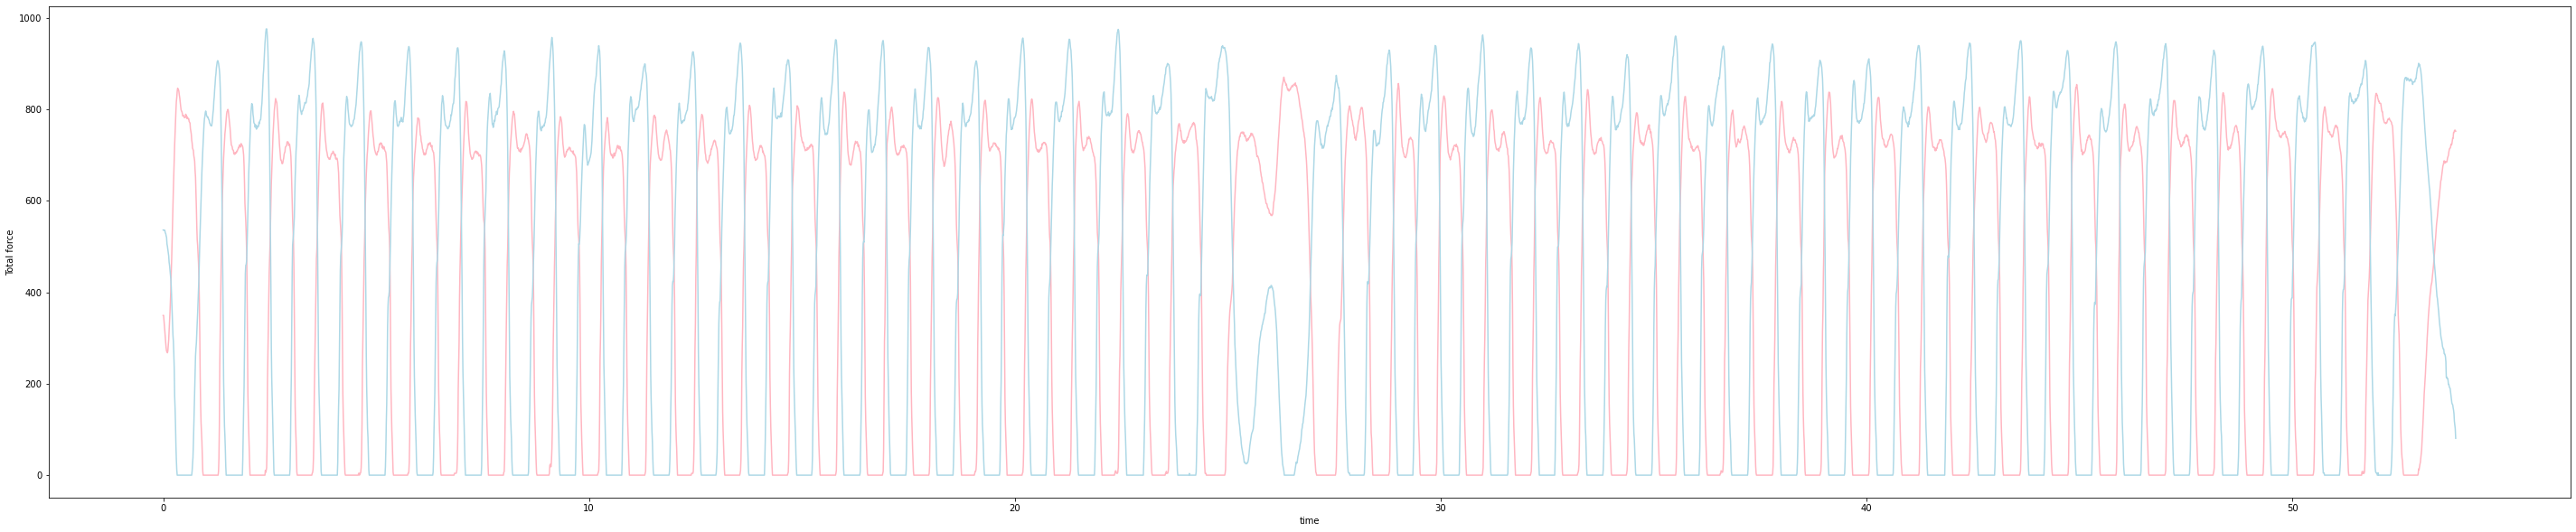

In [8]:
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='time',y='total_l',data=patientss["patient3"],color='lightpink')
sns.lineplot(x='time',y='total_r',data=patientss["patient3"],color='lightblue')
plt.ylabel('Total force')

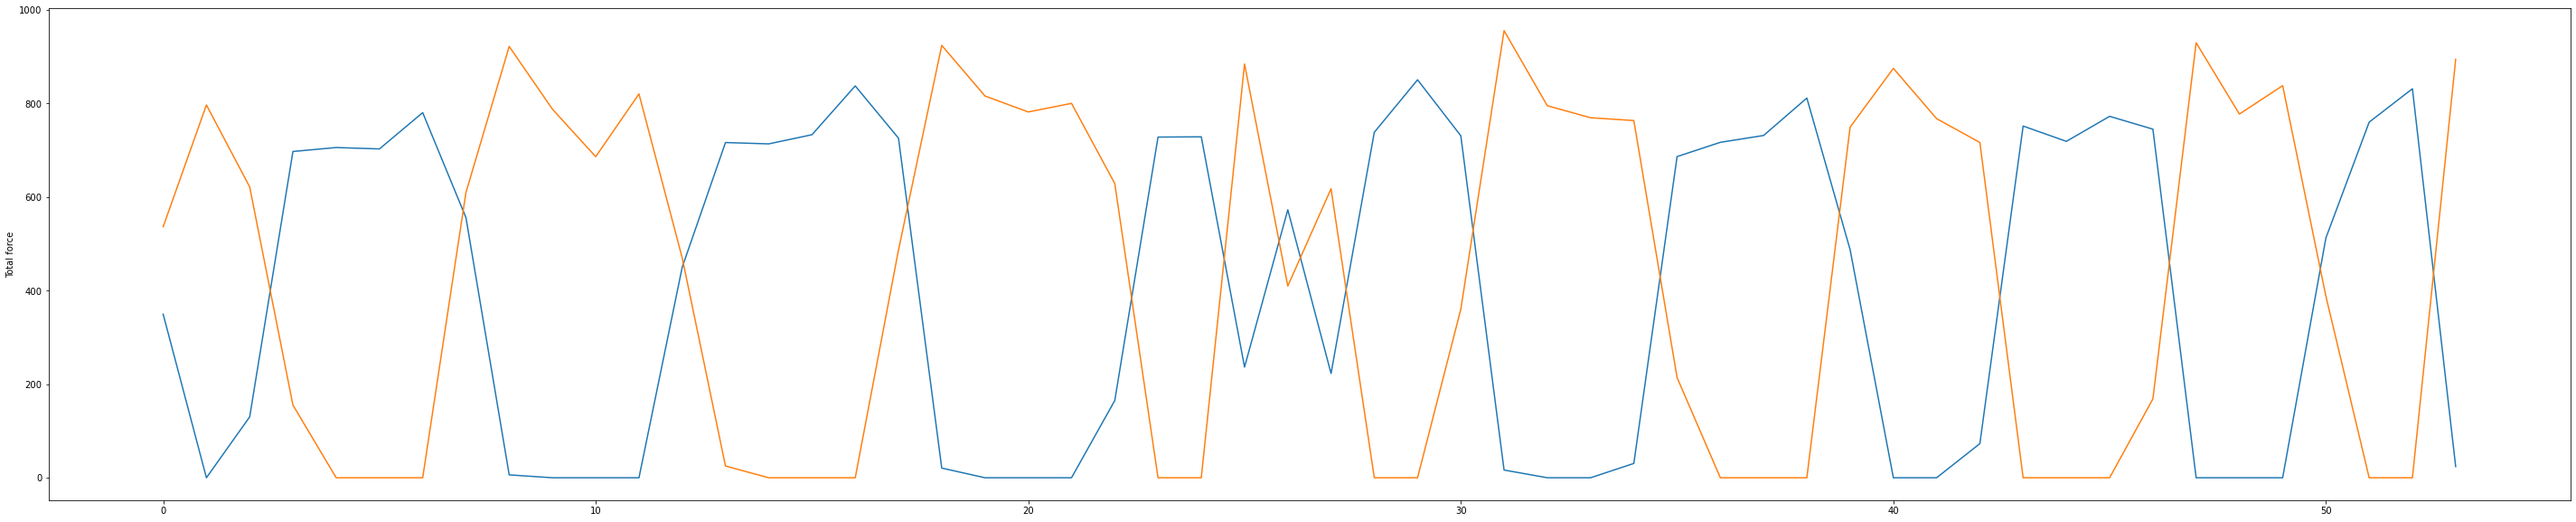

In [9]:
#     fig, axes = plt.subplots(figsize=(50,10))
#     sns.lineplot(x='time',y='total_l',data=patientss[f'patient{id}'],color='lightpink')
#     sns.lineplot(x='time',y='total_r',data=patientss[f'patient{id}'],color='lightblue')
#     plt.ylabel('Total force')

def patientgraph(id):
    try:
        fig, axes = plt.subplots(figsize=(50,10))
        a=patientss[f'patient{id}'].iloc[::100,:3]
        p = plt.plot(a.time,a.values[:,1:])
        plt.ylabel('Total force')

            
    except KeyError:
        raise KeyError("Patient number doesn't exist.") from None
    
patientgraph(3)

In [10]:
patientss

{'patient1':          time  total_l  total_r  id
 0      0.0000   368.39   315.92   1
 1      0.0100   368.39   315.92   1
 2      0.0200   356.95   315.92   1
 3      0.0300   358.38   315.92   1
 4      0.0400   355.63   315.92   1
 ...       ...      ...      ...  ..
 8223  82.2242   434.39   275.11   1
 8224  82.2342   434.39   272.36   1
 8225  82.2442   434.39   276.87   1
 8226  82.2542   435.93   275.33   1
 8227  82.2642   434.39   278.19   1
 
 [8228 rows x 4 columns],
 'patient2':          time  total_l  total_r  id
 0      0.0000   665.61     0.00   2
 1      0.0100   665.61     0.00   2
 2      0.0200   666.05     0.00   2
 3      0.0300   667.70     0.00   2
 4      0.0400   674.63     0.00   2
 ...       ...      ...      ...  ..
 5500  54.9962   405.13   518.32   2
 5501  55.0061   372.46   528.33   2
 5502  55.0161   345.07   543.40   2
 5503  55.0261   317.24   549.12   2
 5504  55.0361   293.48   554.29   2
 
 [5505 rows x 4 columns],
 'patient3':          time  tota